In [6]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path
import os
from scipy.signal import find_peaks
from scipy.signal import welch

In [7]:
file_path= Path("/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette")

### Data loading

In [8]:
psg_file=sorted(glob(os.path.join(file_path,"*PSG.edf")))
hyp_file=sorted(glob(os.path.join(file_path,"*Hypnogram.edf")))
psg_file

['/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4001E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4002E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4011E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4012E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4021E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4022E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4031E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4032E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4041E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4042E0-PSG.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-casse

In [9]:
hyp_file

['/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4001EC-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4002EC-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4011EH-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4012EC-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4021EH-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4022EJ-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4031EC-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4032EP-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4041EC-Hypnogram.edf',
 '/home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4042EC-Hypnogram.edf',
 '/home/fa

### data exploration

In [10]:
raw=mne.io.read_raw_edf(psg_file[0])
raw.info

Extracting EDF parameters from /home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_19746/4111309730.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw=mne.io.read_raw_edf(psg_file[0])
/tmp/ipykernel_19746/4111309730.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw=mne.io.read_raw_edf(psg_file[0])
/tmp/ipykernel_19746/4111309730.py:1: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_edf(psg_file[0])


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>

Extracting EDF parameters from /home/fateme/Downloads/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_19746/57670857.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file[0], preload=True)
/tmp/ipykernel_19746/57670857.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file[0], preload=True)
/tmp/ipykernel_19746/57670857.py:1: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file[0], preload=True)


Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
Using matplotlib as 2D backend.


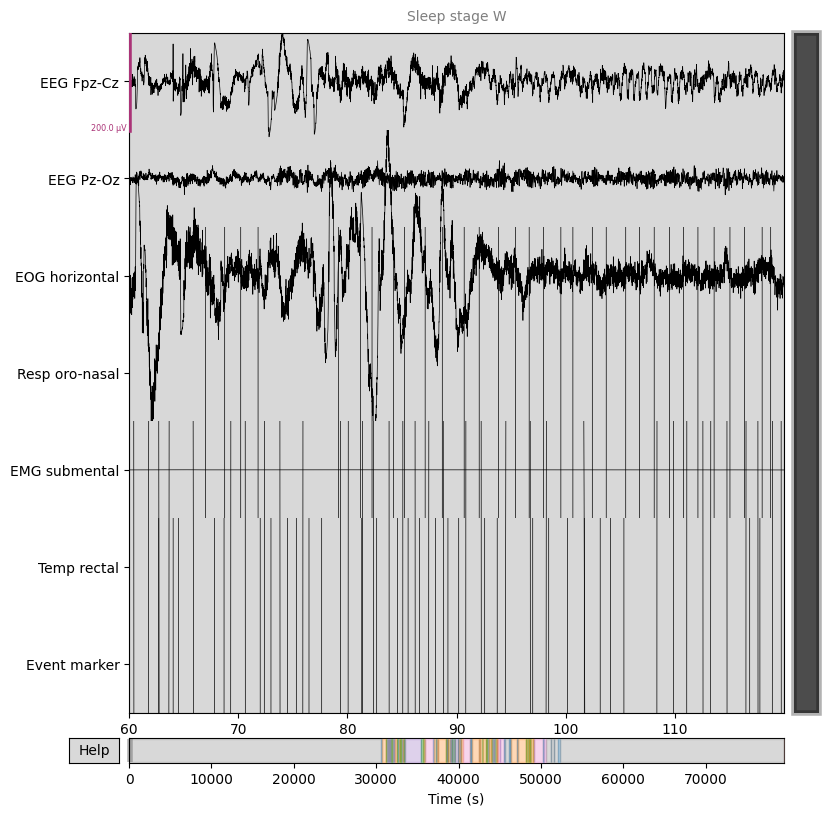

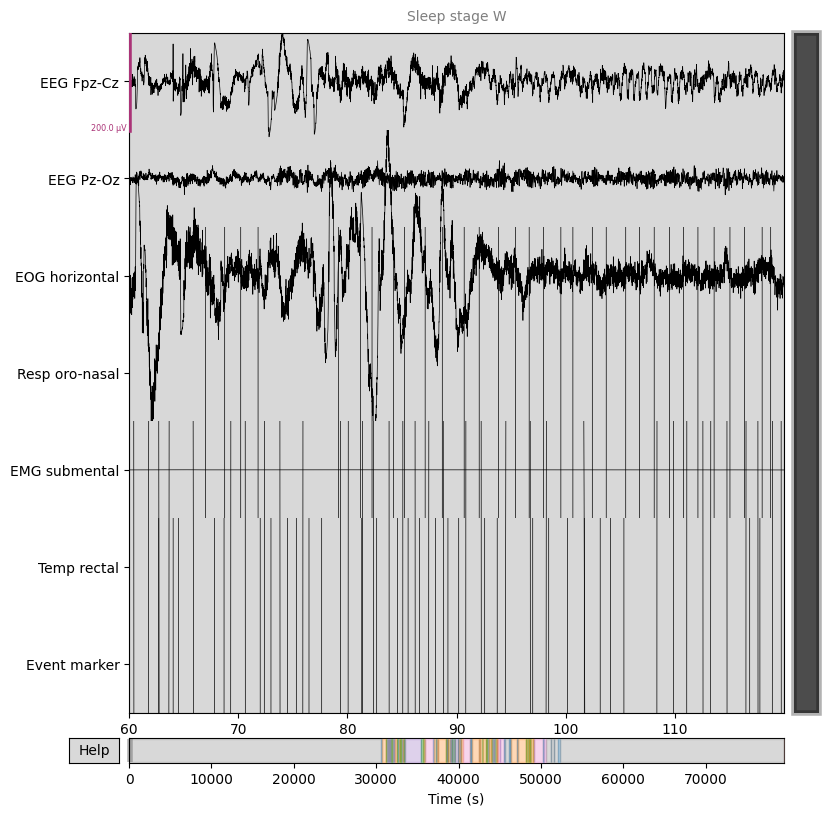

In [11]:
raw = mne.io.read_raw_edf(psg_file[0], preload=True)
annot = mne.read_annotations(hyp_file[0])
raw.set_annotations(annot, emit_warning=False)

raw.plot(
    start=60,
    duration=60,
    scalings=dict(
        eeg=1e-4,
        resp=1e3,
        eog=1e-4,
        emg=1e-7,
        misc=1e-1
    )
)


In [12]:
annot.description

array(['Sleep stage W', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3',
       'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage 3',
       'Sleep stage 4', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage 3',
       'Sleep stage 4', 'Sleep stage W', 'Sleep stage 3', 'Sleep stage 2',
       'Sleep stage 3', 'Sleep stage 4', 'Sleep stage 3', 'Sleep stage 4',
       'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 3',
       'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 2',
       'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4',
       'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4',
       'Sleep stage 3', 'Sleep stage 4', 'Sleep stage 1', 'Sleep stage 3',
       'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 3',
       'Sleep stage R', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3',
       'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 1', 'Sleep stage 2',
       'Sleep stage 3', '

### plot hypnogram

Processing SC4001E0-PSG.edf ...


/tmp/ipykernel_19746/2026411088.py:64: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/2026411088.py:64: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/2026411088.py:64: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/2026411088.py:66: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


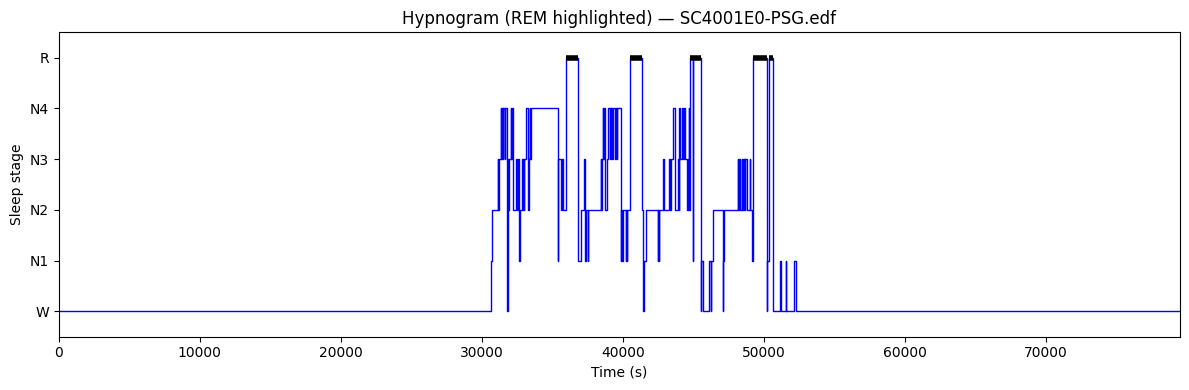

In [13]:
def plot_hypnogram_with_rem(raw, annotations, filename, subject_id):

    fs = raw.info["sfreq"]
    t_end = raw.times[-1]

    stage_map = {
        "Sleep stage W": 0,
        "Sleep stage 1": 1,
        "Sleep stage 2": 2,
        "Sleep stage 3": 3,
        "Sleep stage 4": 4,
        "Sleep stage R": 5,
    }

    x_all, y_all = [], []
    rem_segments = []

    for o, d, s in zip(annotations.onset, annotations.duration, annotations.description):

        label = s.strip()
        start = max(o, 0)
        end   = min(o + d, t_end)

        stage = stage_map.get(label, np.nan)
        if np.isnan(stage):
            continue

        x_all += [start, end]
        y_all += [stage, stage]

        if label == "Sleep stage R":
            rem_segments.append((start, end, stage))

    plt.figure(figsize=(12, 4))

    plt.step(x_all, y_all, where="post", color="blue", linewidth=1)

    for start, end, stage in rem_segments:
        plt.hlines(
            y=stage,
            xmin=start,
            xmax=end,
            colors="black",
            linewidth=4
        )

    plt.xlim(0, t_end)
    plt.ylim(-0.5, 5.5)
    plt.yticks([0, 1, 2, 3, 4, 5], ["W", "N1", "N2", "N3", "N4", "R"])
    plt.xlabel("Time (s)")
    plt.ylabel("Sleep stage")
    plt.title(f"Hypnogram (REM highlighted) — {filename}")
    plt.tight_layout()
    plt.savefig(f"hypnogram_subject_{subject_id}.png", dpi=300, bbox_inches='tight')
    plt.show()


N_subjects = 1

for i, (psg_path, hyp_path) in enumerate(zip(psg_file[:N_subjects], hyp_file[:N_subjects]), start=1):

    print(f"Processing {os.path.basename(psg_path)} ...")

    raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
    annotations = mne.read_annotations(hyp_path)
    raw.set_annotations(annotations)

    plot_hypnogram_with_rem(raw, annotations, os.path.basename(psg_path), i)



### detct phasic and tonic on EOG

### set variable from paper 

In [14]:
window_sec = 4
min_gap_sec = 8
phasic_uv = 100  # threshold for phasic
tonic_uv = 25    # for tonic
EOG_NAME = 'EOG horizontal'
N_subjects= 20 
results = [] 

In [15]:
for i, (psg_path, hyp_path) in enumerate(zip(psg_file[:N_subjects], hyp_file[:N_subjects]), start=1):

    raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
    ann = mne.read_annotations(hyp_path)
    raw.set_annotations(ann)

    raw.filter(0.5, 8.0, picks=[EOG_NAME])

    eog_data, times = raw[EOG_NAME]
    eog = eog_data[0]
    sfreq = float(raw.info["sfreq"])

    print(f"  len(eog) = {len(eog)}, sfreq = {sfreq}")

/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 7950000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8490000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8406000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8550000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8412000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8268000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8460000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8196000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 7710000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8376000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8166000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8418000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8310000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8490000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8430000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8310000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8388000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 7902000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8196000, sfreq = 100.0


/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1107403096.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 661 samples (6.610 s)



/tmp/ipykernel_19746/1107403096.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  len(eog) = 8574000, sfreq = 100.0


In [16]:
# get a boolean mask of the REMs in data
def rem_mask(raw, rem_label="Sleep stage R"):
    n_samples = raw.n_times
    mask = np.zeros(n_samples, dtype=bool)
    for o, d, s in zip(raw.annotations.onset,raw.annotations.duration,raw.annotations.description):
        if s == rem_label:
            start, end = raw.time_as_index([o, o + d])
            mask[start:end] = True
    return mask

In [17]:
def detect_phasic_tonic(eog_data, sf, rem_mask,window_sec=4,min_gap_sec=8,phasic_uv=100,tonic_uv=25,min_peak_distance_sec=0.2):
    
    win = int(window_sec * sf)
    gap = int(min_gap_sec * sf)
    min_dist = int(min_peak_distance_sec * sf)

    phasic = []
    tonic = []
    last_end = -gap
    n = len(eog_data)

    for start in range(0, n - win, win):
        end = start + win

        # only inside REM
        if not rem_mask[start:end].all():
            continue

        # 8 seconds gap
        if start - last_end < gap:
            continue

        seg = eog_data[start:end] * 1e6       
        abs_seg = np.abs(seg)

        # tonic rule
        if abs_seg.max() < tonic_uv:
            tonic.append((start, end))
            last_end = end
            continue

        # detect real peaks >= 100 µV
        peaks, info = find_peaks(abs_seg,
                                 height=phasic_uv,
                                 distance=min_dist)

        if len(peaks) >= 2:
            phasic.append((start, end))
            last_end = end

    return phasic, tonic


[1]  SC4001E0-PSG.edf ...


/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  phasic windows: 65, tonic windows: 70


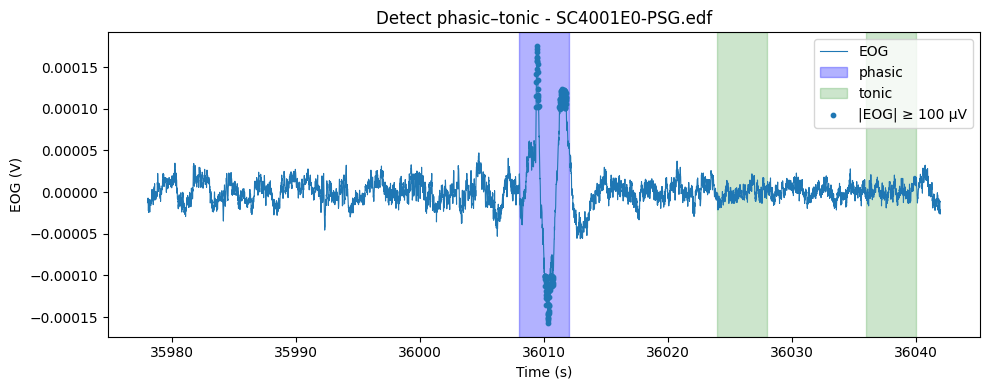

[2]  SC4002E0-PSG.edf ...


/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  phasic windows: 100, tonic windows: 12


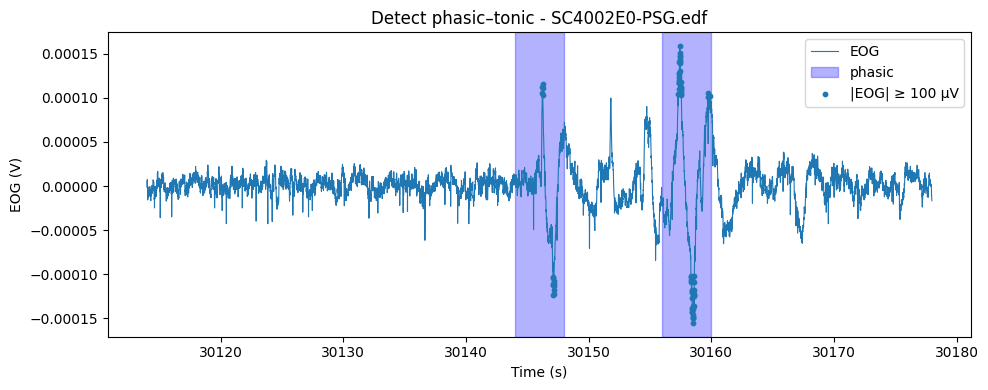

[3]  SC4011E0-PSG.edf ...


/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  phasic windows: 117, tonic windows: 129


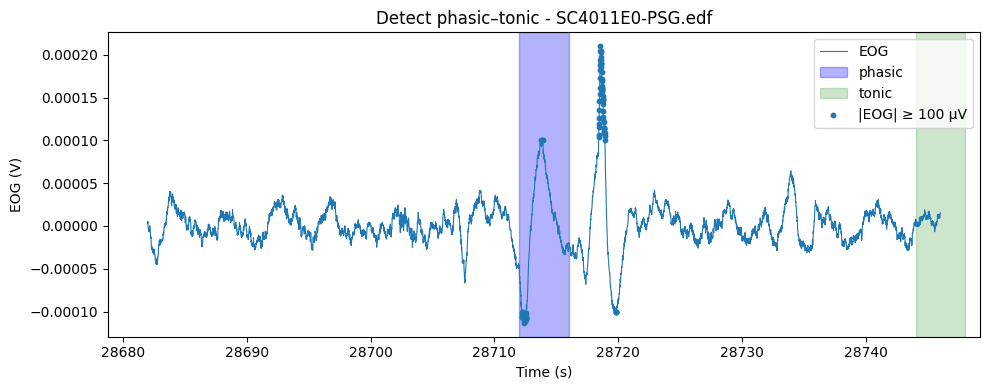

[4]  SC4012E0-PSG.edf ...


/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  phasic windows: 210, tonic windows: 30


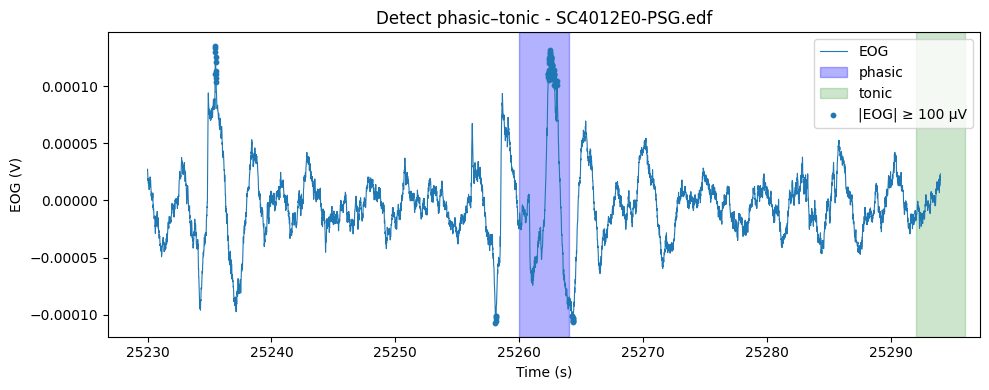

[5]  SC4021E0-PSG.edf ...


/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:7: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/3574380796.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


  phasic windows: 103, tonic windows: 127


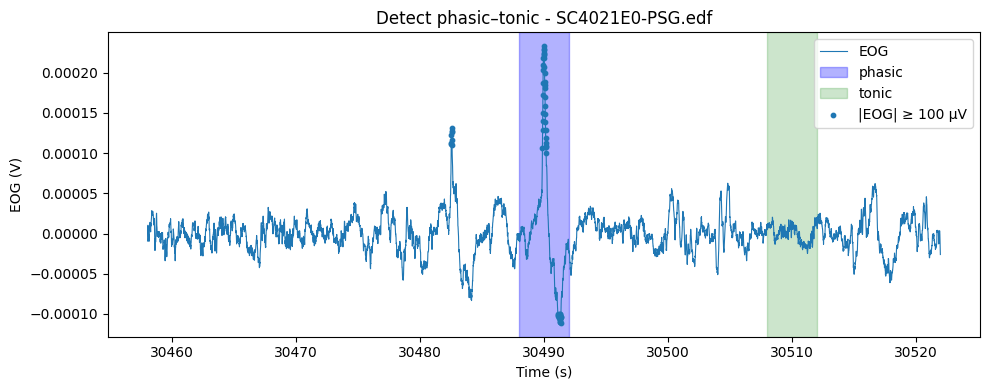

In [28]:
N_subjects=5
for i, (psg_path, hyp_path) in enumerate(zip(psg_file[:N_subjects],hyp_file[:N_subjects]), start=1):

    print(f"[{i}]  {os.path.basename(psg_path)} ...")

  
    raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
    ann = mne.read_annotations(hyp_path)
    raw.set_annotations(ann)

   
    if EOG_NAME not in raw.ch_names:
        print("  EOG channel not found. Available:", raw.ch_names)
        continue

    # pick and filter EOG
    eog_raw = raw.copy().pick([EOG_NAME])  
    eog     = eog_raw.get_data()[0]
    sf      = float(eog_raw.info["sfreq"])

  
    rem_mask_bool = rem_mask(raw, rem_label="Sleep stage R")

    # detect phasic and tonic windows
    phasic, tonic = detect_phasic_tonic(eog, sf, rem_mask_bool)
    print(f"  phasic windows: {len(phasic)}, tonic windows: {len(tonic)}")

    if not phasic and not tonic:
        print("  no phasic or tonic windows to plot")
        continue

    # choose first phasic window, otherwise first tonic
    if phasic:
        first_start, first_end = phasic[0]
    else:
        first_start, first_end = tonic[0]

    padding    = int(30 * sf)
    start_samp = max(first_start - padding, 0)
    end_samp   = min(first_end + padding, len(eog))

    times = np.arange(start_samp, end_samp) / sf
    seg   = eog[start_samp:end_samp]

    plt.figure(figsize=(10, 4))
    plt.plot(times, seg, linewidth=0.8, label="EOG")

    # highlight phasic windows inside this segment (blue)
    added_phasic = False
    for s, e in phasic:
        if e <= start_samp or s >= end_samp:
            continue
        plt.axvspan(
            s / sf, e / sf,
            alpha=0.3,
            color="blue",
            label="phasic" if not added_phasic else None,
        )
        added_phasic = True

    
    added_tonic = False
    for s, e in tonic:
        if e <= start_samp or s >= end_samp:
            continue
        plt.axvspan(
            s / sf, e / sf,
            alpha=0.2,
            color="green",
            label="tonic" if not added_tonic else None,
        )
        added_tonic = True

   
    seg_uv  = seg * 1e6
    big_idx = np.where(np.abs(seg_uv) >= phasic_uv)[0]
    if len(big_idx) > 0:
        plt.scatter(
            times[big_idx],
            seg[big_idx],
            s=10,
            marker="o",
            label=f"|EOG| ≥ {phasic_uv} µV",
        )

    plt.title("Detect phasic–tonic - " + os.path.basename(psg_path))
    plt.xlabel("Time (s)")
    plt.ylabel("EOG (V)")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.savefig(f"EOG_phasic_tonic_subject_{i}.png", dpi=300, bbox_inches='tight')
    plt.show()


### PSD of tonic and phasic REM sleep

In [19]:
bands = {
    "Delta":   (2, 4),
    "Theta":   (4, 8),
    "Alpha1":  (8, 10),
    "Alpha2":  (10, 12),
    "Beta":    (12, 30),
    "Gamma":   (30, 48)
}
EEG_CH = 'EEG Fpz-Cz'


In [20]:
def compute_psd_for_windows(signal, sf, windows, nperseg=256):
    psds = []
    freqs = None

    for s, e in windows:
        seg = signal[s:e]
        if len(seg) < nperseg:
            continue

        f, p = welch(seg, fs=sf, nperseg=nperseg, noverlap=nperseg//2)

        if freqs is None:
            freqs = f
        psds.append(p)

    if len(psds) == 0:
        return freqs, None

    psd_avg = np.mean(psds, axis=0)
    return freqs, psd_avg


[1]  SC4001E0-PSG.edf ...


/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


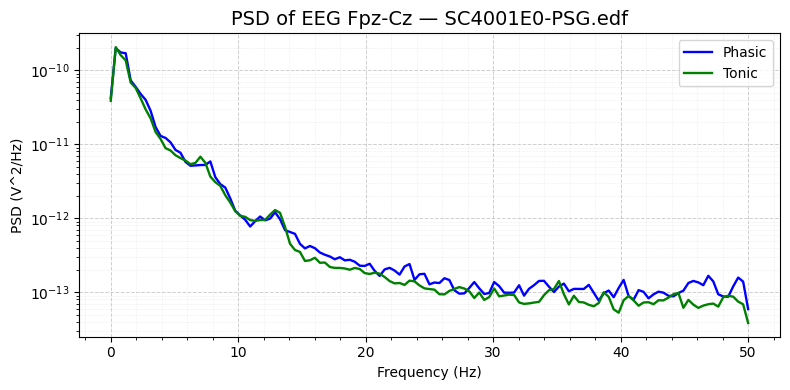

[2]  SC4002E0-PSG.edf ...


/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


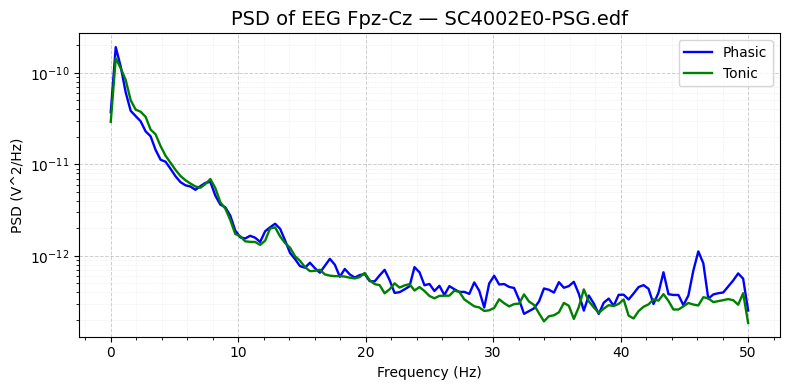

[3]  SC4011E0-PSG.edf ...


/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


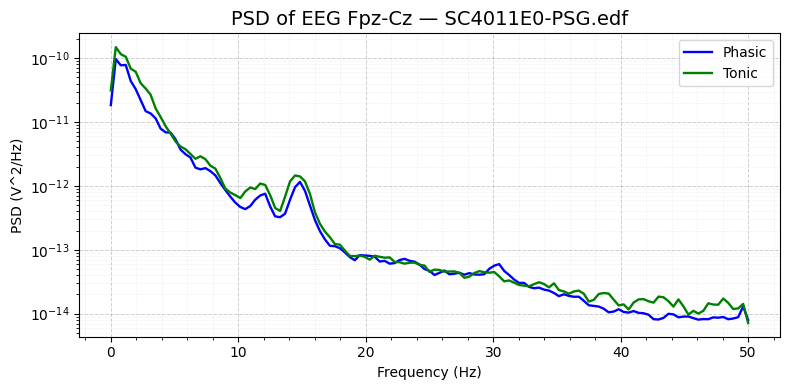

[4]  SC4012E0-PSG.edf ...


/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


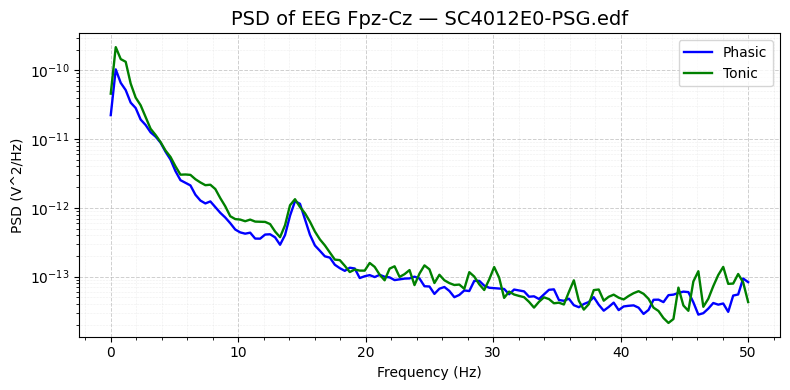

[5]  SC4021E0-PSG.edf ...


/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:10: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/tmp/ipykernel_19746/1830077691.py:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


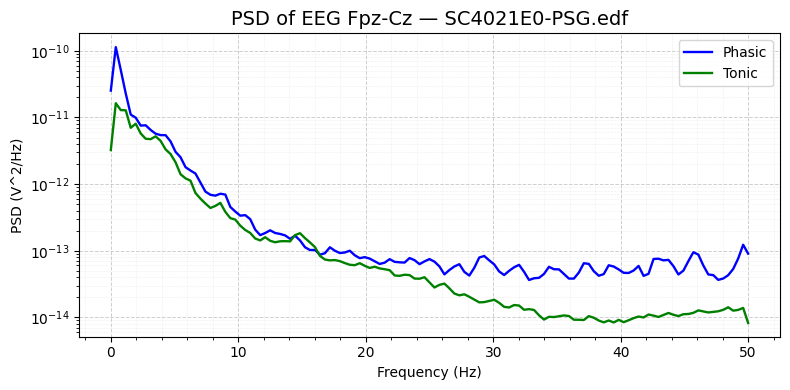

In [27]:
import os
os.makedirs("PSD_images", exist_ok=True)

N_subjects = 5

for i, (psg_path, hyp_path) in enumerate(zip(psg_file[:N_subjects], hyp_file[:N_subjects]), start=1):

    print(f"[{i}]  {os.path.basename(psg_path)} ...")

    raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
    ann = mne.read_annotations(hyp_path)
    raw.set_annotations(ann)

    if EEG_CH not in raw.ch_names:
        print("EEG channel not found:", EEG_CH)
        continue

    eeg_raw = raw.copy().pick([EEG_CH])
    eeg = eeg_raw.get_data()[0]

    f, psd_phasic = compute_psd_for_windows(eeg, sf, phasic)
    _, psd_tonic = compute_psd_for_windows(eeg, sf, tonic)

    filename = os.path.basename(psg_path)  

    plt.figure(figsize=(8,4))

    if psd_phasic is not None:
        plt.semilogy(f, psd_phasic, label="Phasic", color='blue', linewidth=1.7)

    if psd_tonic is not None:
        plt.semilogy(f, psd_tonic, label="Tonic", color='green', linewidth=1.7)

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD (V^2/Hz)")
    plt.title(f"PSD of {EEG_CH} — {filename}", fontsize=14)

    plt.legend()

    plt.minorticks_on()
    plt.grid(which='major', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.4)

    plt.tight_layout()
    plt.savefig(f"PSD_images/subject_{i}.png", dpi=300, bbox_inches='tight')
    plt.show()

    plt.close()


### Bar PLOT

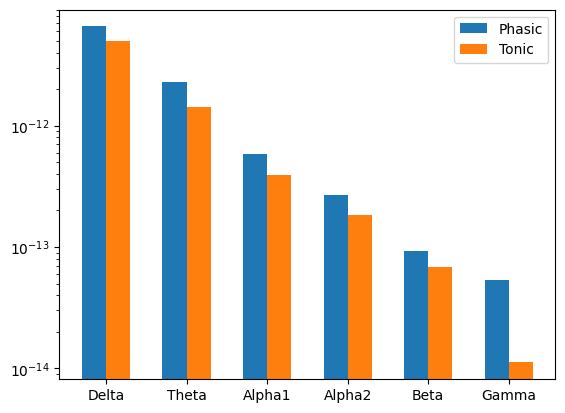

In [24]:
bands = {
    "Delta": (2, 4),
    "Theta": (4, 8),
    "Alpha1": (8, 10),
    "Alpha2": (10, 12),
    "Beta": (12, 30),
    "Gamma": (30, 48),
}

means_phasic = []
means_tonic = []

for name, (f1, f2) in bands.items():
    idx = np.where((f >= f1) & (f <= f2))
    means_phasic.append(np.mean(psd_phasic[idx]))
    means_tonic.append(np.mean(psd_tonic[idx]))

plt.bar(np.arange(len(bands))-0.15, means_phasic, width=0.3, label="Phasic")
plt.bar(np.arange(len(bands))+0.15, means_tonic, width=0.3, label="Tonic")
plt.xticks(np.arange(len(bands)), list(bands.keys()))
plt.yscale("log")
plt.legend()
plt.show()
